In [1]:
import numpy as np
from pyoculus.fields import AnalyticCylindricalBfield
from pyoculus.maps import CylindricalBfieldSection

In [2]:
import logging
logging.basicConfig(level=logging.INFO)

In [3]:
bfield = AnalyticCylindricalBfield(6, 0, 1, 0.5)

In [4]:
section = CylindricalBfieldSection.without_axis(bfield, finderargs={'guess': [6., 0.]}, rtol=1e-10)

INFO:pyoculus.solvers.fixed_point:Newton 0 - x : [6. 0.]
INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': 
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': UNIMPLEMENTED: LoadPjrtPlugin is not implemented on windows yet.
INFO:pyoculus.solvers.fixed_point:Newton 0 - delta_x : [0. 0.]
INFO:pyoculus.solvers.fixed_point:Found fixed point at [6. 0.]. Computing additional data...


In [5]:
from pyoculus.solvers import PoincarePlot

In [17]:
pplot = PoincarePlot.with_horizontal(section, 1, 10)

In [18]:
pplot.compute(compute_iota=True)

array([[[ 6.00000001e+00,  0.00000000e+00],
        [ 6.00000001e+00, -5.24797869e-11],
        [ 6.00000001e+00, -1.04929800e-10],
        ...,
        [ 6.00000001e+00, -8.81407224e-09],
        [ 6.00000001e+00, -8.84226248e-09],
        [ 6.00000001e+00, -8.87015029e-09]],

       [[ 6.11111112e+00,  0.00000000e+00],
        [ 6.11100687e+00, -6.41177243e-03],
        [ 6.11069323e+00, -1.28129538e-02],
        ...,
        [ 5.89308520e+00,  5.03324628e-02],
        [ 5.89597963e+00,  5.54636346e-02],
        [ 5.89912666e+00,  6.04803520e-02]],

       [[ 6.22222223e+00,  0.00000000e+00],
        [ 6.21938685e+00, -4.49983179e-02],
        [ 6.21068617e+00, -8.87967332e-02],
        ...,
        [ 5.76630170e+00,  4.93532755e-02],
        [ 5.77994449e+00,  8.60074882e-02],
        [ 5.80033448e+00,  1.20429161e-01]],

       ...,

       [[ 6.77777778e+00,  0.00000000e+00],
        [ 5.91169166e+00, -8.49116636e-01],
        [ 5.08999287e+00,  1.76155445e-01],
        ...,
     

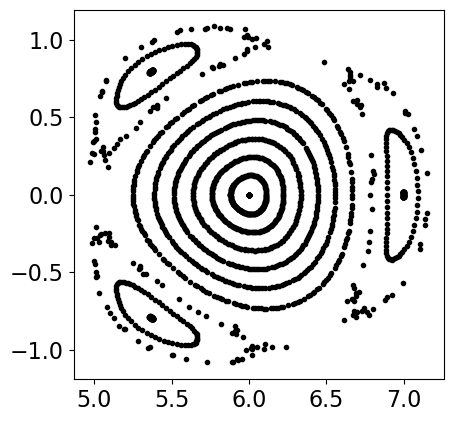

In [19]:
fig, ax = pplot.plot()

In [ ]:
pplot.compute_iota()

In [8]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(np.linalg.norm(pplot.xs, axis=1), 1 / pplot.iota)

### Adding the perturbation

In [9]:
maxwellboltzmann = {"R": section.R0, "Z": section.Z0,
                    "m": 3, "n": -2, "d": 1.75/np.sqrt(2), "type": "maxwell-boltzmann", "amplitude": 1e-1}
bfield.add_perturbation(maxwellboltzmann)

In [10]:
section.find_axis(niter=800, tol=1e-9)

INFO:pyoculus.solvers.fixed_point:Newton 0 - x : [6. 0.]
INFO:pyoculus.solvers.fixed_point:Newton 0 - delta_x : [0. 0.]
INFO:pyoculus.solvers.fixed_point:Found fixed point at [6. 0.]. Computing additional data...


In [12]:
from pyoculus.solvers import FixedPoint

In [13]:
fp = FixedPoint(section)

In [15]:
fp.find(3, [5.05, 0], method='scipy.root')   

INFO:pyoculus.solvers.fixed_point:Found fixed point at [5.02006316e+00 2.68728623e-10]. Computing additional data...


In [20]:
fp.plot(ax=ax)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

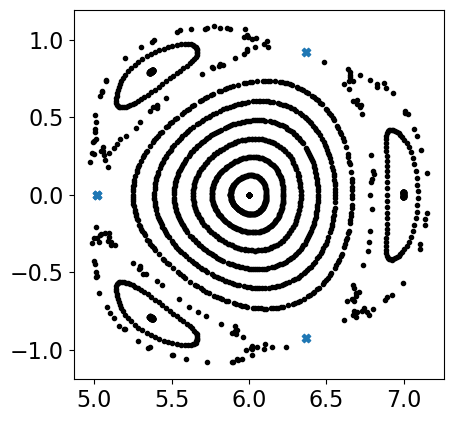

In [21]:
fig